<a href="https://colab.research.google.com/github/PatronesGrupo4/Grupo4/blob/main/Challenges/Challenge_3_Grupo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\Large \textit{C0708 | Reconocimiento de Patrones}$$




$$\large \textbf{Challenge 3 | Training y Testing, Overfitting, regularization, Support Vector Machines}$$

#Integrantes Grupo N°4
- Alonso Santiago Morán Espinoza
- Sergio Enrique Moreno Elescano

#Análisis exploratorio de los datos

Montamos el sistema de archivos de Google Drive al entorno de Colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importamos las bibliotecas necesarias y cargamos dos conjuntos de datos desde archivos CSV

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.set_index('id', inplace=True)
df_train.head()

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever


Proporcionamos un resumen estadístico y de información básica sobre el DataFrame df_train:

In [3]:
df_train.describe()

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,...,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,0.503536,0.449788,0.459689,0.487977,0.517680,0.449788,0.441301,0.487977,0.390382,0.393211,...,0.148515,0.072136,0.097595,0.079208,0.084866,0.154173,0.144272,0.137199,0.032532,0.031117
std,0.500341,0.497825,0.498725,0.500209,0.500041,0.497825,0.496894,0.500209,0.488181,0.488809,...,0.355861,0.258896,0.296977,0.270254,0.278879,0.361370,0.351614,0.344301,0.177533,0.173758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707 entries, 0 to 706
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sudden_fever           707 non-null    float64
 1   headache               707 non-null    float64
 2   mouth_bleed            707 non-null    float64
 3   nose_bleed             707 non-null    float64
 4   muscle_pain            707 non-null    float64
 5   joint_pain             707 non-null    float64
 6   vomiting               707 non-null    float64
 7   rash                   707 non-null    float64
 8   diarrhea               707 non-null    float64
 9   hypotension            707 non-null    float64
 10  pleural_effusion       707 non-null    float64
 11  ascites                707 non-null    float64
 12  gastro_bleeding        707 non-null    float64
 13  swelling               707 non-null    float64
 14  nausea                 707 non-null    float64
 15  chills

#Preprocesamiento

###Encoding

Importamos las bibliotecas necesarias de scikit-learn para el preprocesamiento de datos y la búsqueda aleatoria de hiperparámetros. Además, utilizamos un codificador ordinal (OrdinalEncoder) para convertir las categorías únicas en valores numéricos y asigna estas categorías numéricas a una nueva columna 'prognosis_ENCODED' en el DataFrame df_train.

In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import RandomizedSearchCV, train_test_split

#make an instance of Label Encoder
categorias_target = []
for elemento in df_train['prognosis']:
    if elemento not in categorias_target:
        categorias_target.append(elemento)

encoder = OrdinalEncoder(categories=[categorias_target])
df_train['prognosis_ENCODED'] = encoder.fit_transform(df_train[['prognosis']])
df_train.head()

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis,prognosis_ENCODED
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis,1.0
2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease,0.0
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever,3.0


Dividimos un DataFrame de entrenamiento df_train en características x y etiquetas objetivo y, donde las dos últimas columnas se excluyen de las características. Luego, divide los datos en conjuntos de entrenamiento (x_train y y_train) y prueba (x_test y y_test) en una proporción del 75% para entrenamiento y el 25% para prueba, utilizando una semilla aleatoria para garantizar reproducibilidad.

In [6]:
x = df_train.drop(df_train.columns[-2:], axis=1)
y = df_train["prognosis_ENCODED"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

#Support Vector Machine

Realizamos una búsqueda aleatoria de hiperparámetros para encontrar el mejor modelo de SVM con kernel radial (RBF), utilizando un conjunto de datos de entrenamiento (x_train y y_train). Se busca el mejor valor para los hiperparámetros "C" y "gamma" dentro de rangos específicos definidos en param_grid:

In [7]:
from time import time

import matplotlib.pyplot as plt
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(x_train, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 4.564s
Best estimator found by grid search:
SVC(C=7996.509360477939, class_weight='balanced', gamma=0.043135139100186244)


Procedemos a usar el modelo para predecir el target en el dataset de prueba y analizamos las métricas:

Predicting the target on the test set
done in 0.027s
                       precision    recall  f1-score   support

         Lyme_disease       0.50      0.41      0.45        17
            Tungiasis       0.41      0.47      0.44        15
                 Zika       0.22      0.31      0.26        13
    Rift_Valley_fever       0.16      0.17      0.16        18
      West_Nile_fever       0.12      0.16      0.13        19
              Malaria       0.30      0.25      0.27        12
          Chikungunya       0.65      0.76      0.70        17
               Plague       0.06      0.07      0.06        15
               Dengue       0.18      0.15      0.17        13
         Yellow_Fever       0.12      0.08      0.10        13
Japanese_encephalitis       0.33      0.24      0.28        25

             accuracy                           0.28       177
            macro avg       0.28      0.28      0.27       177
         weighted avg       0.29      0.28      0.28       177


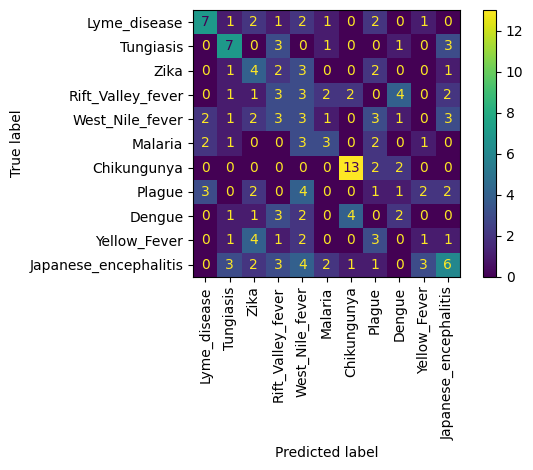

In [8]:
print("Predicting the target on the test set")
t0 = time()
y_pred = clf.predict(x_test)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=categorias_target))
ConfusionMatrixDisplay.from_estimator(
    clf, x_test, y_test, display_labels=categorias_target, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

El modelo tuvo precision muy baja por lo que procedemos a realizar principal component analysis (PCA) y volver a intentar

In [9]:
print("Extracting the principal components")
t0 = time()
pca = PCA(svd_solver="randomized", whiten=True)

# Ajustar PCA al conjunto de entrenamiento para calcular el número de componentes necesarios
pca.fit(x_train)

# Determinar el número de componentes necesarios para conservar el 70% de la varianza
n_components = len(pca.explained_variance_ratio_) - (pca.explained_variance_ratio_.cumsum() >= 0.7).sum() + 1

# Ajustamos PCA con el número de componentes calculado
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True)

t0 = time()

# Ajustar PCA al conjunto de entrenamiento
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
print("done in %0.3fs" % (time() - t0))

Extracting the principal components
done in 0.040s


Volvemos a crear el modelo de SVM y observamos una ligera mejora en la precisión:

Fitting the classifier to the training set
done in 5.294s
Best estimator found by grid search:
SVC(C=3098.370367450662, class_weight='balanced', gamma=0.07775430813820786)
Predicting the target on the test set
done in 0.008s
                       precision    recall  f1-score   support

         Lyme_disease       0.56      0.29      0.38        17
            Tungiasis       0.62      0.53      0.57        15
                 Zika       0.20      0.15      0.17        13
    Rift_Valley_fever       0.33      0.28      0.30        18
      West_Nile_fever       0.20      0.47      0.28        19
              Malaria       0.43      0.25      0.32        12
          Chikungunya       0.70      0.82      0.76        17
               Plague       0.00      0.00      0.00        15
               Dengue       0.15      0.15      0.15        13
         Yellow_Fever       0.14      0.23      0.18        13
Japanese_encephalitis       0.21      0.16      0.18        25

             accu

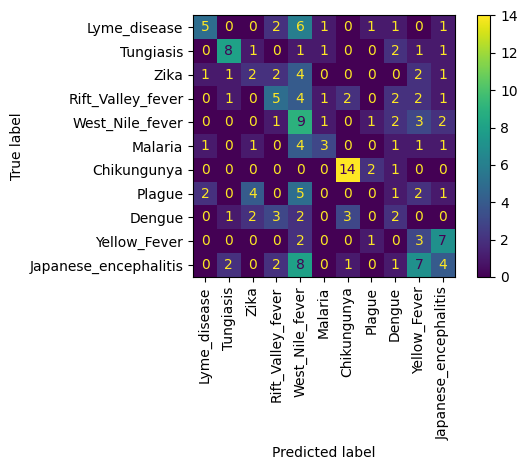

In [10]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(x_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

print("Predicting the target on the test set")
t0 = time()
y_pred = clf.predict(x_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=categorias_target))
ConfusionMatrixDisplay.from_estimator(
    clf, x_test_pca, y_test, display_labels=categorias_target, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

#KNN

Los puntajes de accuracy con KNN son bastante bajos pero en cualquier caso con k=36 se alcanza uno de los mayores en el set de prueba (observados al descomentar la seccion comentada)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

# train_scores, test_scores = list(), list()

# values = [i for i in range(1, 51)]
# for i in values:
#  # configure the model
#  model = KNeighborsClassifier(n_neighbors=i)
#  # fit model on the training dataset
#  model.fit(x_train, y_train)
#  # evaluate on the train dataset
#  train_yhat = model.predict(x_train)
#  train_acc = accuracy_score(y_train, train_yhat)
#  train_scores.append(train_acc)
#  # evaluate on the test dataset
#  test_yhat = model.predict(x_test)
#  test_acc = accuracy_score(y_test, test_yhat)
#  test_scores.append(test_acc)
#  # summarize progress
#  print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

# # plot of train and test scores vs number of neighbors
# pyplot.plot(values, train_scores, '-o', label='Train')
# pyplot.plot(values, test_scores, '-o', label='Test')
# pyplot.ylabel("Accuracy")
# pyplot.xlabel("num neighbors")
# pyplot.legend()
# pyplot.show()

model=KNeighborsClassifier(n_neighbors=36)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.47      0.41      0.44        17
         1.0       0.45      0.67      0.54        15
         2.0       0.10      0.23      0.14        13
         3.0       0.20      0.06      0.09        18
         4.0       0.21      0.21      0.21        19
         5.0       0.36      0.33      0.35        12
         6.0       0.33      1.00      0.50        17
         7.0       0.00      0.00      0.00        15
         8.0       0.00      0.00      0.00        13
         9.0       0.11      0.15      0.13        13
        10.0       0.33      0.08      0.13        25

    accuracy                           0.28       177
   macro avg       0.23      0.29      0.23       177
weighted avg       0.25      0.28      0.23       177



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Naive Bayes

Para features binarios podemos crear un modelo de Naive Bayes Bernoulli, que se usa cuando tenemos features binarios y observamos que conseguimos la mejor precision de entre los 3 modelos.

In [30]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

# Calcular la precisión de las predicciones
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.45      0.53      0.49        17
         1.0       0.52      0.80      0.63        15
         2.0       0.17      0.38      0.23        13
         3.0       0.20      0.11      0.14        18
         4.0       0.15      0.11      0.12        19
         5.0       0.38      0.42      0.40        12
         6.0       0.68      1.00      0.81        17
         7.0       0.00      0.00      0.00        15
         8.0       0.29      0.15      0.20        13
         9.0       0.18      0.31      0.23        13
        10.0       0.40      0.16      0.23        25

    accuracy                           0.35       177
   macro avg       0.31      0.36      0.32       177
weighted avg       0.32      0.35      0.31       177



#Análisis de resultados

- En conclusion, pudimos realizar un análisis exploratorio de los datos, donde observamos que no existian datos atipicos, en la etapa de preprocesamiento usamos un ordinal encoding para codificar el target y poder trabajar con él, creamos modelos de clasificacion basados en Support Vector Machines, K-Nearest Neighbors y Naive Bayes Bernoulli de los cuales obtuvimos sus métricas de evaluación:
- Para SVM previo al Principal Component Analysis dio un accuracy de 0.28
- Para SVM posterior al PCA dio un accuracy de 0.31
- Para KNN usando un k=36 dio un accuracy de 0.28
- Para Naive Bayes Bernoulli dio un accuracy de 0.35, el mayor accuracy de los tres

Sin embargo estos valores nos indican que los 3 modelos son bastante deficiente para la tarea de clasificación propuesta.